# Data Generation

In [22]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = A @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(data_num, 1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50, dim_theta))
# print(A_test)
y_test = A_test @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(50, 1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Solving for the exact mean squared loss (solving Ax = b)

In [23]:
'''
Hints:
1. See the least squares solution to Ax = b (when it is covered in lecture).

2. Use Numpy functions like Numpy's linear algebra functions to solve for x in Ax = b.
In fact, the linear algebra module is already imported with ```import numpy.linalg as la```.

3. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
inverse = la.inv((A.T).dot(A))
theta_pred = inverse.dot((A.T).dot(y_data))

# theta_pred = NotImplemented # TODO: Implement the analytical solution

print('Empirical theta', theta_pred.reshape(-1))

Empirical theta [1.00066421 0.99506782 0.99979805 0.98703747 0.99708337 1.00089019
 1.01694545 0.99654429 1.00628799 1.00798099]


# SGD Variants Noisy Function

In [24]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [25]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0
    
    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_
        
#         print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        4. Checkout the writeup for more hints.
        '''
        grad = deg_*np.abs(err)**(deg_ -1.)*np.sign(err)*x_ # NotImplemented # TODO: Implement the analytical gradient
        l = np.abs(err)**deg_ # NotImplemented # TODO: Implement the loss function
        
        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]
        
    return loss, gradient

# Running SGD Variants

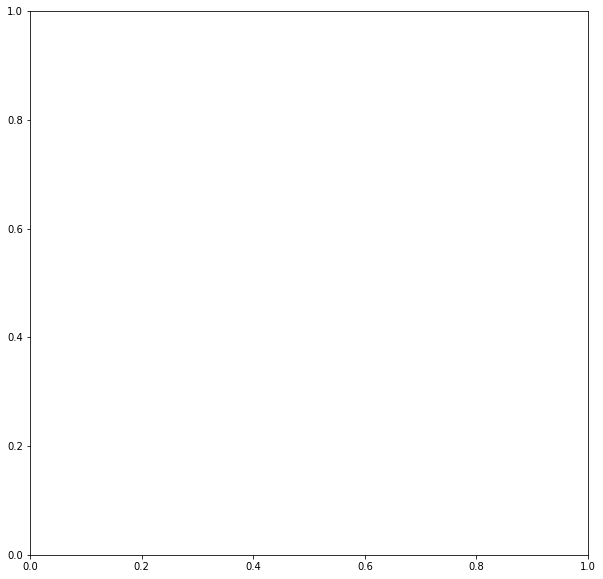

In [26]:
#@title Parameters
deg_ = 2. #@param {type: "number"}
num_rep = 10 #@param {type: "integer"}
max_iter = 1000 #@param {type: "integer"}
fig, ax = plt.subplots(figsize=(10,10))
best_vals = {}
test_exp_interval = 50 #@param {type: "integer"}
grad_artificial_normal_noise_scale = 0. #@param {type: "number"}

In [28]:
for method_idx, method in enumerate(['adam', 'sgd']): #, 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []
    
    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)
            
        if method == 'adam':
#             print('Adam Not implemented.')
            beta_1 = 0.9
            beta_2 = 0.999
            m = 0. #NotImplemented # TODO: Initialize parameters
            v = 0. #NotImplemented
            epsilon = 1e-8 #NotImplemented

#         if method == 'adagrad':
#             print('Adagrad Not implemented.')
#             epsilon = NotImplemented # TODO: Initialize parameters
#             squared_sum = NotImplemented
            
        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size) # Split data
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)
            
            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)                
            
            if method == 'adam':
#                 print('Adam Not implemented.') # TODO: Implement Adam
                m =  beta_1*m + (1-beta_1)*gradient #NotImplemented
                v =  beta_2*v + (1-beta_2)*np.square(gradient) #NotImplemented
                m_hat = m/(1-beta_1**t)  #NotImplemented
                v_hat = v/(1-beta_2**t)  #NotImplemented
                theta_hat = theta_hat - lr*np.divide(m_hat,(np.sqrt(v_hat)+epsilon))  #NotImplemented
            
#             elif method == 'adagrad':
#                 print('Adagrad Not implemented.')
#                 squared_sum = squared_sum + NotImplemented # TODO: Implement Adagrad
#                 theta_hat = theta_hat - lr * NotImplemented
            
            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient
        
        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)
    
    print(theta_hat)
    print(method, 'done')
    x_axis = np.arange(max_iter)[::test_exp_interval]
    
#     print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
#     print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
#     test_loss_np = np.array(test_loss_mat)
    
#     print('Not implemented.')
#     '''
#     Hints:
#     1. Use test_loss_np in np.mean() with axis = 0
#     '''
#     test_loss_mean = NotImplemented # TODO: Calculate the mean test loss

#     '''
#     Hints:
#     1. Use test_loss_np in np.std() with axis = 0 
#     2. Divide by np.sqrt() using num_rep as a parameter
#     '''
#     test_loss_se = NotImplemented # TODO: Calculate the standard error for test loss

#     plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
#     best_vals[method] = min(test_loss_mean)

adam 0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sign


[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
adam done
sgd 0
[[0.52477099]
 [0.60025881]
 [0.52084017]
 [0.50686777]
 [0.56772556]
 [0.55328132]
 [0.47320909]
 [0.4526505 ]
 [0.5196334 ]
 [0.48670478]]
sgd done


No handles with labels found to put in legend.


Text(0.5, 0, 'Updates')

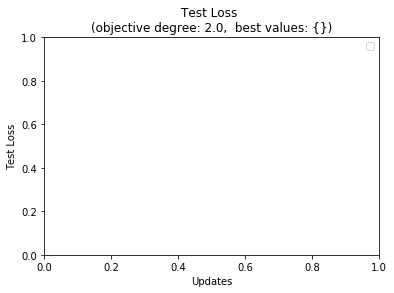

In [13]:
best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')